# Comp 6934 Winter 2025 Note 11

by E Brown.



We're going to introduce some other common plotting packages before moving on tho talking about how to choose and design plots.

This set of notes will discuss Seaborn.

# Seaborn

There a lot of [packages that extend or build upon matplotlib](https://matplotlib.org/thirdpartypackages/), 
and you should be generally aware of them so you can adopt one when necessary.

Seaborn specifically makes design choices, chart type combinations and colors and style choices easier, in the sense that many popular and visually compelling choices are already programmed for you.

What you loose is the ability to make low-level design decisions by mix-and-matching axes and their plots in lower-level matplotlib calls.

The danger in *only* using Seaborn is that you will simply choose from the available plot designs and not consider making your own designs because they are easy.

Example galleries are helpful for getting ideas and suggestions, but galleries do not remind you that you have more flexibility in matplotlib to design your plot combinations.  

* A matplotlib gallery: https://matplotlib.org/stable/gallery/index.html
* A seaborn gallery: https://seaborn.pydata.org/examples/index.html

## Tutorial

I'm incorporating the beginner tutorial from Moez Ali at datacamp here. 
* https://www.datacamp.com/tutorial/seaborn-python-tutorial

Make sure you review it. His tutorial is as good as anything I can offer, and you are expectyed to be familiar with the plotting calls he discusses.


## Example

Here's a comparison for line fitting in seaborn versus out preious work with matplotlib:

In [8]:
import seaborn as sns
import pandas as pd

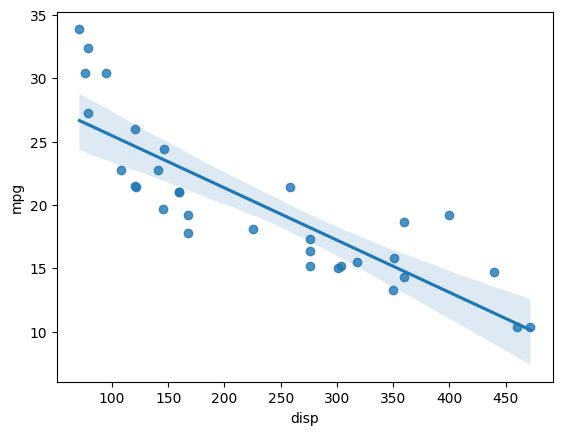

In [12]:
mtcarsDF = pd.read_csv('datasets/mtcars.csv')
sns.regplot(x='disp', y='mpg', data=mtcarsDF);


That was easier than matplotlib and if you check [the documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html) regplot has a lot of choices for configuring the plot. You even get a 95% confidence interval shaded for the line fit, which is something else that analysts often like to see.

However, drop lines for the residuals  not one of the options. So if you want to add drop lines, you would probably revert back to using matplotlib calls and add them to the plot.

sns.regplot doe not even give the the line slope or the residual values, so it is not too helpful to a statistician.

## Practice data sets

Seaborn comes with a call to pull practice data set from [a git repository](https://github.com/mwaskom/seaborn-data/blob/master/README.md). The listing is:

In [13]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## Heatmap

A heatmap uses color to shoe a quantative value in relationship to a categorical value. Its advantage over a histogram is when there are two categorical variables in the relationship.

We're using the example from the seaborn manual. https://seaborn.pydata.org/generated/seaborn.heatmap.html

The glue dataset https://gluebenchmark.com/leaderboard/ is a comparison of natural language understanding models, given a set of language comprehension tasks. The score is the performance of each computer model on each task. 

In [43]:
ld = sns.load_dataset('glue')
ld

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


The heatmap method requires the data to be laid out in a 2 x 2 grid. This is not tidy, so we create it just for the heatmap.

In [50]:
matrixDF = ld.pivot(index="Model", columns="Task", values="Score")
matrixDF

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


Seaborn basic heatmap. In the traditional color pattern red is "hot" (higher values) and blue are "cold" (lower) values.

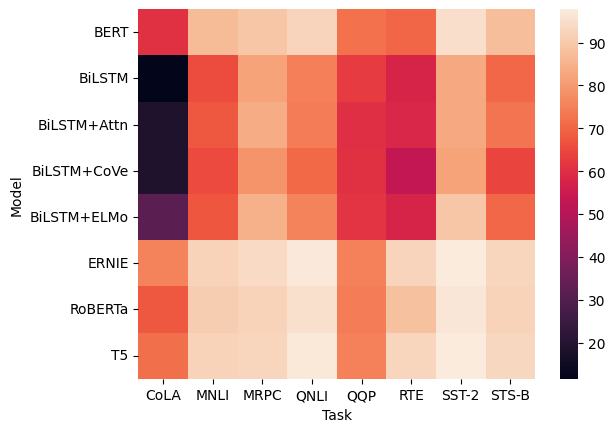

In [46]:
sns.heatmap(matrixDF)
plt.show()

Some of the advantage Seaborn heatmaps have over matplot lib are selections of color palettes and adding annotation to the heatmap. You can do both in matplotlib, but seaborn makes it easy.


<Axes: xlabel='Task', ylabel='Model'>

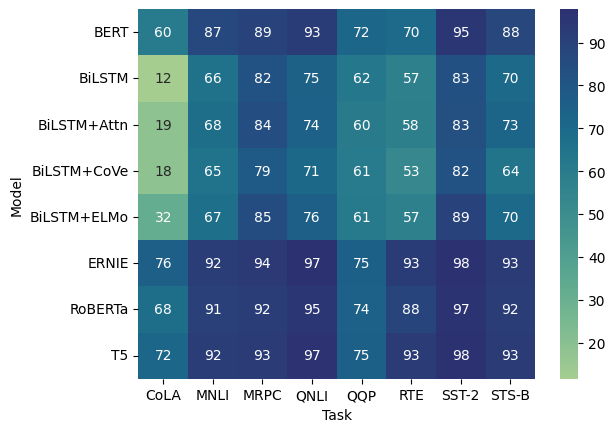

In [54]:
sns.heatmap(matrixDF, cmap="crest", annot=True)

Check out the [documentation](https://seaborn.pydata.org/) for more options on heatmap and other seaborn plot types.